In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (22.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falli

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
!pip install tqdm
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 53.0 MB/s 


# 2. 데이터 분석 및 전처리

In [ ]:
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint
from tqdm.notebook import tqdm
from konlpy.tag import Okt, Mecab

PATH = '/content/drive/MyDrive/final-project/data'
df = pd.read_csv(PATH + '/movie_crawling_판타지.csv')

df.head()

,Unnamed: 0,genre,movie_name,score,review
0,0,판타지,반지의 제왕: 왕의 귀환,10,내가 극장에서 이 영화를 봣다는게 너무 자랑스럽고 감동적입니다
1,1,판타지,반지의 제왕: 왕의 귀환,10,현존하는 최고의 판타지영화... 퀄리티가 절대 애들용이 아님
2,2,판타지,반지의 제왕: 왕의 귀환,10,왜 이영화를이제서야봤는지ㅠㅠ 일편부터연달아보는데 재밌다가도 시간가는게너무안타까웠음ㅠ...
3,3,판타지,반지의 제왕: 왕의 귀환,10,몇년이 지난 영화인데도 소름돋는영화.
4,4,판타지,반지의 제왕: 왕의 귀환,10,반지의제왕 안본사람은 있어도한번본 사람은 없다는게 사실인가요


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88274 entries, 0 to 88273
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  88274 non-null  int64 
 1   genre       88274 non-null  object
 2   movie_name  88274 non-null  object
 3   score       88274 non-null  int64 
 4   review      87072 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.4+ MB


In [ ]:
print(len(df['movie_name'].unique()))
pprint.pprint(df['movie_name'].unique())

111
array(['반지의 제왕: 왕의 귀환', '해리 포터와 마법사의 돌', '반지의 제왕: 두 개의 탑',
       '반지의 제왕: 반지 원정대', '천녀유혼', '가위손', '캐리비안의 해적 - 블랙 펄의 저주', '조 블랙의 사랑',
       '온워드: 단 하루의 기적', '천녀유혼 3 - 도도도', '벤자민 버튼의 시간은 거꾸로 간다',
       '천녀유혼 2 - 인간도', '캐리비안의 해적 - 망자의 함', '해리 포터와 비밀의 방',
       '팀 버튼의 크리스마스 악몽', '스타더스트', '드라큐라', '찰리와 초콜릿 공장', '미녀와 야수',
       '해리 포터와 아즈카반의 죄수', '스트레인저 댄 픽션', '당신, 거기 있어줄래요', '큐브',
       '나니아 연대기 - 캐스피언 왕자', '천국의 우편배달부', '13층', '천년여우 여우비', '스파이더위크가의 비밀',
       '록키 호러 픽쳐 쇼', '호빗: 다섯 군대 전투', '호빗 : 스마우그의 폐허',
       '아더와 미니모이: 제1탄 비밀 원정대의 출정', '미스 페레그린과 이상한 아이들의 집', '호빗 : 뜻밖의 여정',
       '존 말코비치 되기', '오늘 밤, 로맨스 극장에서', '불청객', '헝거게임: 캣칭 파이어', '비밀',
       '판의 미로 - 오필리아와 세 개의 열쇠', '내안의 그놈', '말레피센트', '인랑',
       '캐리비안의 해적 - 세상의 끝에서', '경계선', '슬리피 할로우', '신비한 동물사전', '메리 포핀스 리턴즈',
       '케이트 앤 레오폴드', '환생', '나니아 연대기: 새벽 출정호의 항해', '캐리비안의 해적: 낯선 조류',
       '해리 포터와 불의 잔', '드라큘라: 전설의 시작', '더 도어', '자투라 - 스페이스 어드벤쳐', '트와일라잇',
       '신과함께-죄와 벌', '코난 : 암흑의 시대', '헨젤과 그레텔', '신과함께-인과 연', '소년, 천국에 가다'

In [ ]:
df.isna().sum()

Unnamed: 0       0
genre            0
movie_name       0
score            0
review        1202
dtype: int64

In [ ]:
df[df['review'].isna()]

,Unnamed: 0,genre,movie_name,score,review
405,405,판타지,반지의 제왕: 왕의 귀환,10,NaN
407,407,판타지,반지의 제왕: 왕의 귀환,10,NaN
421,421,판타지,반지의 제왕: 왕의 귀환,10,NaN
427,427,판타지,반지의 제왕: 왕의 귀환,10,NaN
428,428,판타지,반지의 제왕: 왕의 귀환,10,NaN
...,...,...,...,...,...
82153,82153,판타지,스케어리 스토리: 어둠의 속삭임,10,NaN
82167,82167,판타지,스케어리 스토리: 어둠의 속삭임,10,NaN
84447,84447,판타지,숲속으로,10,NaN
84472,84472,판타지,숲속으로,1,NaN


In [ ]:
df = df.dropna()

123
1
33.40260933480338
26.0


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


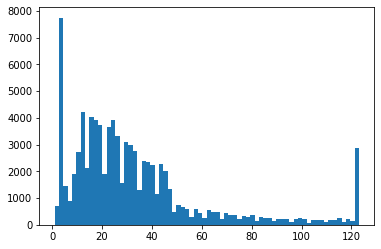

In [ ]:
reviews = df['review']
reviews_len = reviews.apply(len)
print(reviews_len.max())
print(reviews_len.min())
print(reviews_len.mean())
print(reviews_len.median())

plt.hist(reviews_len, bins=70)
plt.show()

In [ ]:
# 형태소 분석기 이용해 명사만 뽑아내는 과정
# 형태소 분석기는 Mecab 사용 (okt, kkma, Komoran 등등 존재)

okt = Okt()

In [ ]:
okt.pos(df['review'][134])    # Noun로 먼저 키워드 추출 / 고려해볼만한 것 형용사,  

[('호빗', 'Noun'),
 ('의', 'Josa'),
 ('영', 'Modifier'),
 ('상미', 'Noun'),
 ('는', 'Josa'),
 ('너무', 'Adverb'),
 ('역', 'Noun'),
 ('동', 'Modifier'),
 ('적', 'Noun'),
 ('인', 'Josa'),
 ('느낌', 'Noun'),
 ('이', 'Josa'),
 ('들어서', 'Verb'),
 ('CG', 'Alpha'),
 ('의', 'Noun'),
 ('퀄리티', 'Noun'),
 ('는', 'Josa'),
 ('있으나', 'Adjective'),
 ('이', 'Determiner'),
 ('질감', 'Noun'),
 ('이', 'Josa'),
 ('느껴짐', 'Verb'),
 ('.', 'Punctuation'),
 ('하지만', 'Conjunction'),
 ('반지', 'Noun'),
 ('의', 'Josa'),
 ('제왕', 'Noun'),
 ('은', 'Josa'),
 ('그런것', 'Adjective'),
 ('없이', 'Adverb'),
 ('감정', 'Noun'),
 ('이입', 'Noun'),
 ('이', 'Josa'),
 ('잘', 'Verb'),
 ('전달', 'Noun'),
 ('되네요', 'Verb'),
 ('.', 'Punctuation')]

In [ ]:
# 품사 태깅
# review_list = df['review'].tolist()
# after_pos = []

# for review in tqdm(review_list):
#     result = okt.pos(review)
#     after_pos.append(result)

# after_pos[:5]

In [ ]:
review_list = df['review'].tolist()
nouns = []

for review in tqdm(review_list):
    result = okt.nouns(review)
    nouns.append(result)

nouns[:5]

  0%|          | 0/87072 [00:00<?, ?it/s]

[['내', '극장', '이', '영화', '봣다는', '감동'],
 ['존', '최고', '판타지영화', '퀄리티', '절대', '애', '용이'],
 ['왜',
  '이영화',
  '이제',
  '일편',
  '연달',
  '시간',
  '해리포터',
  '반지의제왕',
  '해리포터',
  '명작',
  '것',
  '이지나',
  '전혀',
  '안',
  '가슴',
  '며칠',
  '진짜'],
 ['년', '지난', '영화', '도', '소름', '영화'],
 ['반지의제왕', '안', '사람', '한번', '사람', '사실']]

In [ ]:
from wordcloud import WordCloud
from collections import Counter

count = Counter(nouns[0])
for noun in tqdm(nouns[1:]):
    count += Counter(noun)

# print(count)
count

  0%|          | 0/87071 [00:00<?, ?it/s]

Counter({'내': 2360,
         '극장': 589,
         '이': 3564,
         '영화': 26383,
         '봣다는': 2,
         '감동': 2532,
         '존': 117,
         '최고': 3621,
         '판타지영화': 300,
         '퀄리티': 133,
         '절대': 364,
         '애': 975,
         '용이': 156,
         '왜': 2323,
         '이영화': 833,
         '이제': 485,
         '일편': 9,
         '연달': 14,
         '시간': 1759,
         '해리포터': 1605,
         '반지의제왕': 451,
         '명작': 1381,
         '것': 3109,
         '이지나': 9,
         '전혀': 435,
         '안': 1137,
         '가슴': 457,
         '며칠': 19,
         '진짜': 5027,
         '년': 170,
         '지난': 95,
         '도': 744,
         '소름': 264,
         '사람': 2356,
         '한번': 762,
         '사실': 280,
         '거': 1886,
         '안보': 241,
         '판타지': 2821,
         '논': 38,
         '트와일라잇': 253,
         '앞': 362,
         '장난': 205,
         '뿐': 402,
         '시리즈': 2081,
         '산맥': 7,
         '어쩌': 22,
         '비교': 346,
         '멍청이': 10,
         '반지

In [ ]:
print(len(count))
print(count)

20211
Counter({'영화': 26383, '관람객': 6429, '정말': 5064, '진짜': 5027, '스토리': 4452, '점': 3880, '최고': 3621, '이': 3564, '생각': 3518, '평점': 3164, '것': 3109, '연기': 3021, '편': 2997, '더': 2952, '보고': 2870, '판타지': 2821, '볼': 2795, '때': 2573, '감동': 2532, '좀': 2466, '내용': 2437, '내': 2360, '사람': 2356, '왜': 2323, '재미': 2257, '말': 2090, '시리즈': 2081, '그냥': 2081, '사랑': 1915, '배우': 1897, '거': 1886, '수': 1849, '마지막': 1841, '원작': 1827, '느낌': 1790, '시간': 1759, '그': 1737, '다시': 1716, '완전': 1691, '나': 1618, '해리포터': 1605, '정도': 1587, '동화': 1559, '역시': 1533, '뭐': 1512, '이야기': 1507, '기대': 1483, '처음': 1457, '보기': 1427, '인생': 1417, '주인공': 1400, '장면': 1386, '명작': 1381, '임': 1352, '감독': 1310, '하나': 1296, '난': 1292, '작품': 1268, '듯': 1265, '돈': 1221, '책': 1213, '평': 1200, '또': 1198, '감상': 1191, '영상': 1176, '지금': 1146, '안': 1137, '매력': 1126, '연출': 1077, '중': 1070, '이건': 1060, '별로': 1040, '함': 1021, '전개': 1016, '때문': 1010, '끝': 1007, '액션': 994, '개': 987, '애': 975, '꼭': 956, '뭔가': 948, '가장': 942, '눈': 938, '부분': 935, '이해': 

In [ ]:
dict1 = dict(count)
print(sorted(dict1))

['가', '가가', '가각', '가감', '가게', '가격', '가공', '가관', '가교', '가급', '가기', '가까스로', '가까이', '가꼬', '가끔', '가나', '가나다', '가난', '가내', '가노', '가늠', '가능', '가능성', '가다가', '가다해', '가담', '가당', '가도', '가독성', '가동', '가드', '가득', '가든', '가디언', '가디언즈', '가뜩이나', '가라', '가라사대', '가라지', '가락', '가량', '가려진', '가령', '가로', '가로등', '가루', '가르침', '가릋펴주', '가리개', '가마', '가마치', '가막', '가맘에듬', '가망', '가면', '가명', '가모', '가묘', '가문', '가물', '가뭄', '가미', '가바', '가발', '가방', '가벼렸다', '가보', '가봉', '가분', '가불', '가브리엘', '가사', '가사도', '가산', '가상', '가상공간', '가상세계', '가상일', '가상현실', '가선', '가성', '가세', '가소', '가속', '가수', '가스', '가스실', '가스통', '가슴', '가슴속', '가슴앓이', '가시', '가식', '가십걸', '가쓰', '가안', '가압', '가야', '가야금', '가약', '가업', '가연', '가엽다', '가오', '가오루', '가왜', '가요', '가운', '가운데', '가운데땅', '가원', '가위', '가위눌림', '가위손', '가유', '가을', '가의', '가이거', '가이드', '가이사', '가이아', '가인', '가입', '가잔', '가장', '가장재밋', '가재', '가점', '가정', '가정부', '가정사', '가제', '가조', '가족', '가족관계도', '가족드', '가족사', '가족영화', '가주', '가죽', '가중', '가즈', '가지', '가지가지', '가짜', '가차', '가창', '가창력', '가책', '가추', '가출', '가치', '가치관', '가타', '가탄',

In [ ]:
# 사전
# 형태소 변환사전: 영상미

# 불용어 제거: 1글자, "스포일러가 포함된 감상평입니다. 감상평 보기"
# 불용어
# (자주 등장하는, 상위 빈도수의) 영화와 관련된 보편적인 단어: 영화제목들, 영화, 관람객, 생각, 평점, 해리포터, 하나, 작품, 아이, 
# 부사, 형용사적 의미를 갖는 명사: 정말, 진짜, 최고, 그냥, 마지막, 다시, 완전, 정도, 역시, 처음, 지금, 이건, 별로, 때문, 뭔가, 가장, 조금, 제일


# 불용어 리스트 정의
# 1. 부사, 형용사적 의미를 갖는 명사, (자주 등장하는, 상위 빈도수의) 영화와 관련된 보편적인 단어
stopword = ['정말', '진짜', '최고', '그냥', '마지막', '다시', '완전', '정도', '역시', '처음', '지금', '이건', '별로', '때문', '뭔가', '가장', '조금', '제일',
            '영화', '관람객', '생각', '평점', '해리포터', '하나', '작품', '아이']
# 2. 영화 타이틀 추가
for title in df['movie_name'].unique().tolist():
    stopword.append(title)
# 확인
print(stopword)
print(len(stopword))


# 전처리 함수 정의
# input: nouns
# [['내', '극장', '이', '영화', '봣다는', '감동'], ...]
def Preprocess(review_list):

    clean_review_list = []

    # 한글자로 된 단어 및 불용어 제거
    for review in review_list:
        clean_review = []
        for noun in review:
            if len(noun) == 1 or noun in stopword:
                continue
            clean_review.append(noun)

        # 제거 후 빈 리뷰는 저장하지 않음
        if clean_review:
            clean_review_list.append(clean_review)

    return clean_review_list
    

data = Preprocess(nouns)
print(data[:30])
print(len(data))

# 영상구조, 영상기술, 화려한 영상, 압도적인 영상 => 영상

['정말', '진짜', '최고', '그냥', '마지막', '다시', '완전', '정도', '역시', '처음', '지금', '이건', '별로', '때문', '뭔가', '가장', '조금', '제일', '영화', '관람객', '생각', '평점', '해리포터', '하나', '작품', '아이', '반지의 제왕: 왕의 귀환', '해리 포터와 마법사의 돌', '반지의 제왕: 두 개의 탑', '반지의 제왕: 반지 원정대', '천녀유혼', '가위손', '캐리비안의 해적 - 블랙 펄의 저주', '조 블랙의 사랑', '온워드: 단 하루의 기적', '천녀유혼 3 - 도도도', '벤자민 버튼의 시간은 거꾸로 간다', '천녀유혼 2 - 인간도', '캐리비안의 해적 - 망자의 함', '해리 포터와 비밀의 방', '팀 버튼의 크리스마스 악몽', '스타더스트', '드라큐라', '찰리와 초콜릿 공장', '미녀와 야수', '해리 포터와 아즈카반의 죄수', '스트레인저 댄 픽션', '당신, 거기 있어줄래요', '큐브', '나니아 연대기 - 캐스피언 왕자', '천국의 우편배달부', '13층', '천년여우 여우비', '스파이더위크가의 비밀', '록키 호러 픽쳐 쇼', '호빗: 다섯 군대 전투', '호빗 : 스마우그의 폐허', '아더와 미니모이: 제1탄 비밀 원정대의 출정', '미스 페레그린과 이상한 아이들의 집', '호빗 : 뜻밖의 여정', '존 말코비치 되기', '오늘 밤, 로맨스 극장에서', '불청객', '헝거게임: 캣칭 파이어', '비밀', '판의 미로 - 오필리아와 세 개의 열쇠', '내안의 그놈', '말레피센트', '인랑', '캐리비안의 해적 - 세상의 끝에서', '경계선', '슬리피 할로우', '신비한 동물사전', '메리 포핀스 리턴즈', '케이트 앤 레오폴드', '환생', '나니아 연대기: 새벽 출정호의 항해', '캐리비안의 해적: 낯선 조류', '해리 포터와 불의 잔', '드라큘라: 전설의 시작', '더 도어', '자투라 - 스페이스 어드벤쳐', '트와일라잇', '신과함께-죄와 벌',

In [ ]:
# csv로 저장
import csv

save_data = {'Review':data}
df_save = pd.Series(data)
df_save.head()
df_save.to_csv(PATH + '/clean_data.csv')
# with open(PATH + 'clean_data.csv', 'w', newline='') as f:
#     write = csv.writer(f)
    
#     write.writerow('Review')
#     for line in data:
#         write.writerow(''.join(line))

In [ ]:
asdf = pd.read_csv(PATH + '/clean_data.csv')
asdf.head()

,Unnamed: 0,0
0,0,"['극장', '봣다는', '감동']"
1,1,"['판타지영화', '퀄리티', '절대', '용이']"
2,2,"['이영화', '이제', '일편', '연달', '시간', '반지의제왕', '명작',..."
3,3,"['지난', '소름']"
4,4,"['반지의제왕', '사람', '한번', '사람', '사실']"


In [ ]:
## 영상미: 1244, 
# print(dict1['영'], dict1['상미'])
print(len(dict1))
print(len(stopword))

18932
137


In [ ]:
pprint.pprint(dict1)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 '전범': 2,
 '전별': 1,
 '전병': 4,
 '전보': 5,
 '전복': 2,
 '전부': 176,
 '전부일': 1,
 '전사': 45,
 '전생': 9,
 '전설': 220,
 '전설의고향': 19,
 '전성': 2,
 '전성기': 31,
 '전세': 3,
 '전세계': 25,
 '전소민': 2,
 '전시': 2,
 '전시회': 1,
 '전야제': 1,
 '전여자친구': 1,
 '전여친': 4,
 '전역': 3,
 '전염': 1,
 '전완': 1,
 '전용': 10,
 '전우': 1,
 '전우치': 1,
 '전우치전': 1,
 '전원': 4,
 '전율': 83,
 '전의': 22,
 '전이': 23,
 '전인': 5,
 '전일': 1,
 '전자': 7,
 '전자제품': 1,
 '전작': 314,
 '전장': 5,
 '전쟁': 188,
 '전쟁사': 1,
 '전쟁씬': 19,
 '전쟁영화': 6,
 '전적': 27,
 '전전긍긍': 1,
 '전제': 3,
 '전주곡': 1,
 '전지': 2,
 '전지현': 3,
 '전직': 3,
 '전진': 3,
 '전진우': 1,
 '전차': 1,
 '전채': 1,
 '전철': 1,
 '전체': 371,
 '전체관람가': 89,
 '전체주의': 1,
 '전초': 3,
 '전초전': 5,
 '전통': 6,
 '전투': 176,
 '전투기': 3,
 '전투력': 1,
 '전투씬': 162,
 '전퍈': 1,
 '전편': 399,
 '전하': 20,
 '전함': 1,
 '전해': 5,
 '전해질': 1,
 '전혀': 435,
 '전현무': 1,
 '전형': 96,
 '전혜빈': 1,
 '전화': 1,
 '전화기': 1,
 '전환': 67,
 '전효성': 1,
 '전후': 8,
 '절감': 2,
 '절교': 3,
 '절규': 6,
 '절단': 2,
 '절대': 364,
 '절대로': 23,
 '절대반지': 8,
 '절도': 1,
 '절때': 10,
 '절레

In [ ]:
# 전처리 명사리스트 저장
import json

def Save_noun(data, file_path, file_name):
    # save 
    with open(file_path + file_name, 'w') as f:
        json.dump(data, f, indent=4)
    

with open(PATH + 'clean_noun.json', 'w') as f:
    json.dump(dict1, f, indent=4)

In [ ]:
# '스토리': 4452, '연기': 3021, '감동': 2532, '내용': 2437, '이야기': 1507, '연출': 1077, '액션': 994
# 진짜 -> 명사와 부사로 쓰임 -> 따로 사전만들어 제거하는 것 고려
# 자주 등장하지만 키워드에 영향이 없는 단어 제거 필요성
# TF-IDF



# 나중에 할 것
# 1. 감성분석
# => 어떤 키워드가 해당 장르의 감성에 얼마나 영향을 주는지
# 2. 장르별 키워드 가이드
# 

In [ ]:
cloud = WordCloud().generate_from_frequencies(count)

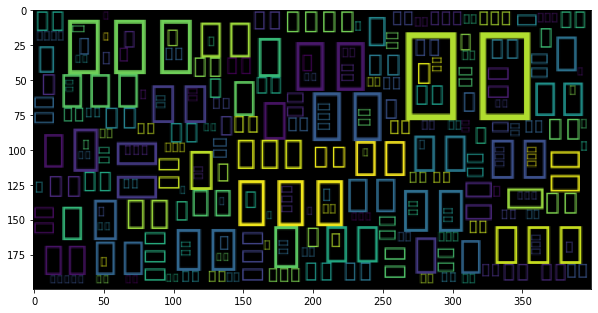

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(cloud)
plt.show()